<a href="https://colab.research.google.com/github/PawinData/UC/blob/SFBA/Everyday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from Construct_DF import construct_DF
from plot_Tempo_Spatio import plot_Tempo_Spatio
from STAR import obj_func, STAR_pm, STAR_predict, STAR_analysis


In [0]:
url = "https://query.data.world/s/7ifvvpyy23sa2fciuvcygehakxlnnv"

COUNTIES = ["San Francisco", "Alameda",  "Contra Costa", "Marin", "Napa", 
            "San Mateo", "Santa Clara", "Solano", "Sonoma"]
COUNTIES.sort()

STATE = "California"

INFO = pd.read_csv("https://raw.githubusercontent.com/PawinData/UC/SFBA/INFO.csv", index_col=0)

In [4]:
# construct the dataframe
# each row as a time series for a county
DF = construct_DF(url, STATE, COUNTIES, INFO)
DF

,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22
Alameda,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.598326,0.000000,0.598326,0.000000,0.000000,0.598326,0.000000,0.000000,12.564851,0.598326,...,0.000000,4.786610,1.794979,5.384936,2.393305,2.393305,5.983262,11.966525,23.933050,7.179915,7.179915,2.991631,25.728028,25.129702,21.539745,8.376567,7.778241,17.949787,27.523007,22.138071,28.121333,0.000000,73.594128,13.163177,27.523007,23.933050,23.334723,19.146440,36.497901,22.138071,25.728028,0.598326,44.874468,51.456057,8.974894,30.514638,29.916312,16.154809,28.719660,0.000000
Contra Costa,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.866907,0.000000,0.000000,2.600722,0.000000,4.334536,0.000000,0.000000,...,0.000000,0.000000,7.802165,0.000000,6.068350,0.866907,3.467629,4.334536,8.669072,8.669072,13.003608,19.071958,19.938866,17.338144,14.737422,6.068350,10.402886,30.341752,24.273402,22.539587,26.874123,39.877731,28.607938,26.874123,21.672680,17.338144,19.071958,23.406495,16.471237,7.802165,11.269794,41.611546,13.003608,13.870515,14.737422,32.075567,6.935258,12.136701,36.410103,12.136701
Marin,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.961824,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.961824,0.000000,...,0.000000,0.000000,0.000000,0.000000,47.541886,35.656415,51.503710,0.000000,0.000000,35.656415,23.770943,0.000000,47.541886,15.847295,19.809119,75.274653,23.770943,11.885472,23.770943,39.618239,51.503710,23.770943,15.847295,7.923648,19.809119,3.961824,19.809119,0.000000,-3.961824,43.580063,23.770943,3.961824,51.503710,11.885472,0.000000,7.923648,23.770943,15.847295,3.961824,11.885472
Napa,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7.326866,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.653732,0.000000,0.000000,21.980598,7.326866,21.980598,0.000000,7.326866,29.307465,7.326866,21.980598,0.000000,14.653732,0.000000,0.000000,7.326866,14.653732,14.653732,21.980598,29.307465,14.653732,0.000000,0.000000,29.307465,0.000000,7.326866,36.634331,14.653732,0.000000,14.653732,36.634331,29.307465
San Francisco,0.000000,0.0,2.268734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.134367,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.268734,0.000000,6.806201,0.000000,5.671834,1.134367,...,5.671834,6.806201,6.806201,3.403101,5.671834,24.956072,6.806201,5.671834,30.627906,26.090439,20.418604,32.896640,51.046510,63.524546,29.493539,39.702841,35.165374,29.493539,41.971575,14.746770,56.718345,32.896640,47.643409,17.015503,40.837208,64.658913,54.449611,82.808783,68.062014,17.015503,96.421186,34.031007,2

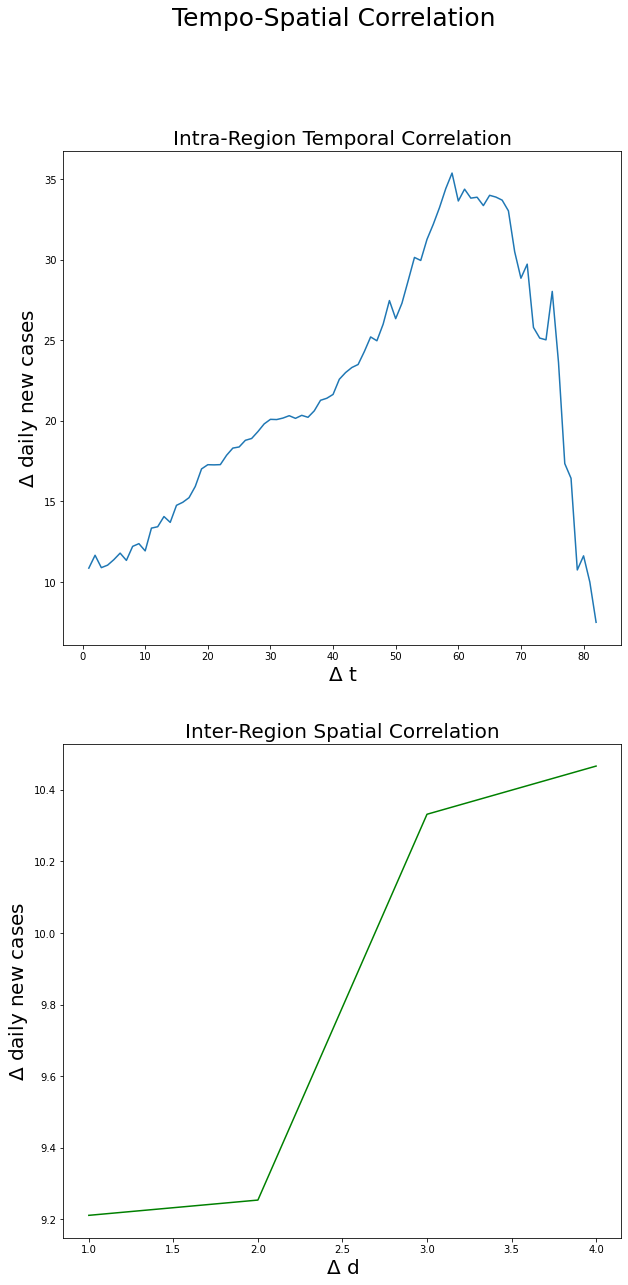

In [26]:
# generate a plot
# Intra-Region Temporal + Inter-Region Spatial Correlations
DistanceMatrix = pd.read_csv("https://raw.githubusercontent.com/PawinData/UC/SFBA/DistanceMatrix_shortestnetworks.csv", index_col=0)
plot_Tempo_Spatio(DF, DistanceMatrix)

In [0]:
Y = DF.to_numpy()
Dist = DistanceMatrix.to_numpy()
D = np.random.rand(Dist.shape[0], Dist.shape[1])

for i in range(D.shape[0]): 
    for j in range(D.shape[1]):
        if Dist[i][j]==0:
            D[i][j] = 0
        else:
            D[i][j] = 1 / float(Dist[i][j])

In [38]:
D


array([[0.        , 1.        , 0.5       , 0.33333333, 1.        ,
        1.        , 1.        , 0.5       , 0.33333333],
       [1.        , 0.        , 1.        , 0.5       , 1.        ,
        0.5       , 0.5       , 1.        , 0.5       ],
       [0.5       , 1.        , 0.        , 0.5       , 1.        ,
        0.5       , 0.33333333, 0.5       , 1.        ],
       [0.33333333, 0.5       , 0.5       , 0.        , 0.33333333,
        0.25      , 0.25      , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.33333333, 0.        ,
        1.        , 0.5       , 0.5       , 0.5       ],
       [1.        , 0.5       , 0.5       , 0.25      , 1.        ,
        0.        , 1.        , 0.33333333, 0.33333333],
       [1.        , 0.5       , 0.33333333, 0.25      , 0.5       ,
        1.        , 0.        , 0.33333333, 0.25      ],
       [0.5       , 1.        , 0.5       , 1.        , 0.5       ,
        0.33333333, 0.33333333, 0.        , 0.5       ],


In [52]:
for TT in range(1,14+1):
    output = STAR_analysis(Y=Y,D=D,T=TT)
    print("T =", TT, ": Error =", round(output,2))

T = 1 : Error = 15.65
T = 2 : Error = 16.93
T = 3 : Error = 17.81
T = 4 : Error = 18.87
T = 5 : Error = 18.72
T = 6 : Error = 17.15
T = 7 : Error = 17.99
T = 8 : Error = 18.06
T = 9 : Error = 15.45
T = 10 : Error = 14.56
T = 11 : Error = 16.06
T = 12 : Error = 15.11
T = 13 : Error = 15.92
T = 14 : Error = 13.72
